# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()

Define high low trade periods

In [4]:
period = 7

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, period)
s.run()

2000-01-03 00:00:00 BUY  6 ^GSPC @ 1455.22
2000-01-18 00:00:00 SELL 6 ^GSPC @ 1455.14
2000-01-24 00:00:00 BUY  7 ^GSPC @ 1401.53
2000-02-04 00:00:00 SELL 7 ^GSPC @ 1424.37
2000-02-11 00:00:00 BUY  7 ^GSPC @ 1387.12
2000-03-01 00:00:00 SELL 7 ^GSPC @ 1379.19
2000-03-30 00:00:00 BUY  6 ^GSPC @ 1487.92
2000-04-10 00:00:00 SELL 6 ^GSPC @ 1504.46
2000-04-12 00:00:00 BUY  6 ^GSPC @ 1467.17
2000-04-26 00:00:00 SELL 6 ^GSPC @ 1460.99
2000-05-03 00:00:00 BUY  7 ^GSPC @ 1415.10
2000-05-16 00:00:00 SELL 7 ^GSPC @ 1466.04
2000-05-19 00:00:00 BUY  7 ^GSPC @ 1406.95
2000-05-31 00:00:00 SELL 7 ^GSPC @ 1420.60
2000-06-12 00:00:00 BUY  7 ^GSPC @ 1446.00
2000-06-16 00:00:00 SELL 7 ^GSPC @ 1464.46
2000-06-22 00:00:00 BUY  7 ^GSPC @ 1452.18
2000-07-05 00:00:00 SELL 7 ^GSPC @ 1446.23
2000-07-21 00:00:00 BUY  7 ^GSPC @ 1480.19
2000-08-04 00:00:00 SELL 7 ^GSPC @ 1462.93
2000-09-06 00:00:00 BUY  7 ^GSPC @ 1492.25
2000-09-29 00:00:00 SELL 7 ^GSPC @ 1436.51
2002-03-14 00:00:00 BUY  9 ^GSPC @ 1153.04
2002-03-20 

Retrieve log DataFrames

In [6]:
s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [7]:
s.tlog.tail(100)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total
81,2010-11-12,1199.21,2010-12-02,1206.81,7.60,91.20,12,4736.48
82,2011-01-28,1276.34,2011-02-02,1305.91,29.57,325.27,11,5061.76
83,2011-02-22,1315.44,2011-03-04,1330.73,15.29,168.19,11,5229.95
84,2011-03-10,1295.11,2011-03-25,1311.80,16.69,183.59,11,5413.54
85,2011-04-11,1324.46,2011-04-21,1333.23,8.77,96.47,11,5510.01
86,2011-05-05,1335.10,2011-06-01,1345.20,10.10,111.10,11,5621.11
87,2011-06-02,1312.94,2011-06-22,1295.48,-17.46,-192.06,11,5429.05
88,2011-07-11,1319.49,2011-07-20,1328.66,9.17,100.87,11,5529.92
89,2011-07-27,1304.89,2011-08-16,1204.22,-100.67,-1107.37,11,4422.55
90,2012-01-30,1313.01,2012-02-06,1344.32,31.31,313.10,10,4735.65


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-07-18,26246.16,26246.16,26246.16,0,26246.16,1
2019-07-19,26246.16,26246.16,26246.16,8,2433.28,0
2019-07-22,26358.96,26246.48,26313.52,8,2433.28,1
2019-07-23,26480.48,26341.76,26477.04,8,2433.28,1
2019-07-24,26391.20,26391.20,26391.20,0,26391.20,2


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                   2000-01-03
end                                                     2019-07-24
beginning_balance                                            10000
ending_balance                                            26391.20
total_net_profit                                          16391.20
gross_profit                                              30435.83
gross_loss                                               -14044.63
profit_factor                                                 2.17
return_on_initial_capital                                   163.91
annual_return_rate                                            5.09
trading_period                           19 years 6 months 21 days
pct_time_in_market                                           31.30
total_num_trades                                               181
num_winning_trades                                             141
num_losing_trades                                             

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2000-01-03 00:00:00 BUY  6 ^GSPC @ 1455.22
2019-07-24 00:00:00 SELL -6 ^GSPC @ 3019.56


Plot Equity Curves: Strategy vs Benchmark

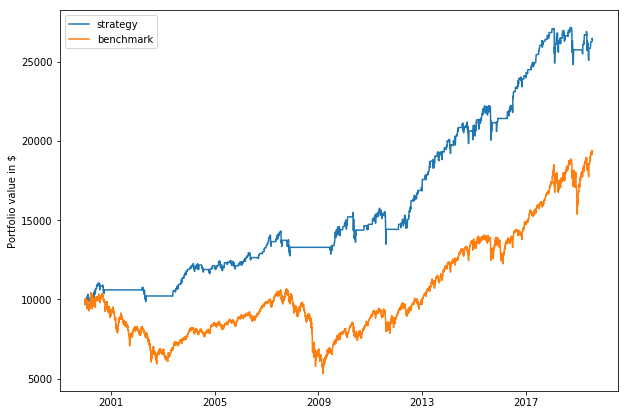

In [11]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

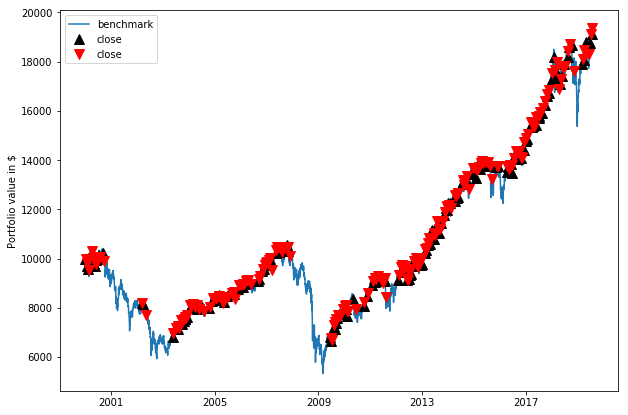

In [12]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,5.09,3.44
max_closed_out_drawdown,-14.36,-50.02
drawdown_annualized_return,-2.82,-14.53
drawdown_recovery,-0.25,-1.42
best_month,10.29,17.90
worst_month,-12.57,-24.09
sharpe_ratio,0.63,0.29
sortino_ratio,0.44,0.38
monthly_std,1.79,3.80


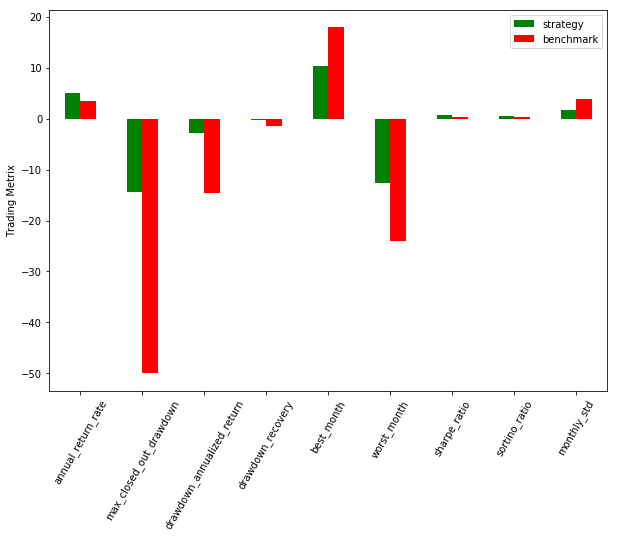

In [13]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df